# Import Libraries

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [28]:
dataset = pd.read_csv("Titanic-Dataset.csv")

In [29]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Checking for NULL values

In [30]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Visualizations 

### Plot of survivors vs Non-survivors gender-wise

<Axes: xlabel='Survived', ylabel='count'>

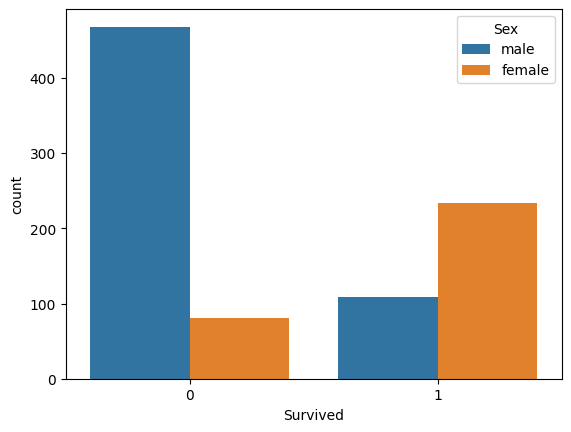

In [31]:
sns.countplot(x='Survived',data=dataset,hue = 'Sex')

##### The number of female survivors are greater than the number of male survivors. Also, the numer of men who did not survive is also almost 4 times greater than the women who didn't.  

### Plot of survivors vs Non-survivors ticket-class wise

AttributeError: 'numpy.int64' object has no attribute 'startswith'

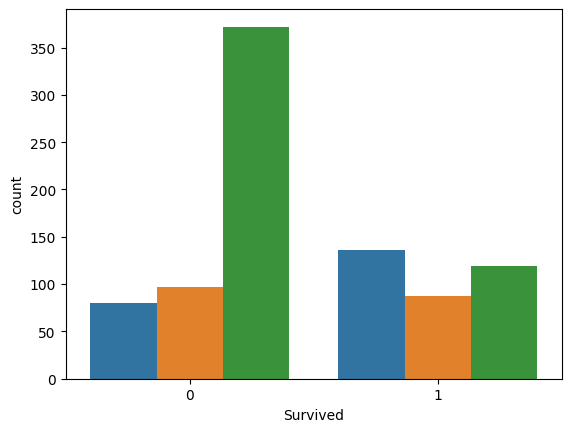

In [32]:
# dataset['Pclass'] = dataset['Pclass'].astype(str)
# dataset['Survived'] = dataset['Survived'].astype(str)
sns.countplot(x='Survived',data=dataset, hue='Pclass')
print(f"The different types of classes of tickets are: {dataset['Pclass'].unique()}")
print(f"The number of people in Class 3 tickets = {dataset['Pclass'].value_counts()['3']}")
print(f"The number of people in Class 2 tickets = {dataset['Pclass'].value_counts()['2']}")
print(f"The number of people in Class 1 tickets = {dataset['Pclass'].value_counts()['1']}")

##### We can see that a lot of people who travelled by a Class 3 tikcket havent survived this could be due to the fact that the number of Class 3 tickets were higher in comparison to the other types. 

# NULL VALUE TREATMENT

##### We shall replace all the null values in column Cabin with a custom value 'YO', in embarked with the mode value and for age, we can find the median of the age with pclass and age as parameters.

In [34]:
dataset.Embarked.fillna(dataset.Embarked.mode()[0], inplace = True)
dataset.Cabin = dataset.Cabin.fillna('YO')    
grp = dataset.groupby(['Sex', 'Pclass'])
dataset['Age'] = grp['Age'].transform(lambda x: x.fillna(x.median()))
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,YO,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.45,YO,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,YO,Q


# Encoding